# Running Window diffusion coefficient

## Diffusion Coefficient of PB and HOPS

In [40]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

sns.set(color_codes=True, style="white")

In [ ]:
mean_step_size_threshold_nm = 30 
R2_threshold = 0.6
conversion_factor = 117 

In [42]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [43]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = basename(file)
        df = df.dropna(subset=['D_linear'])
        df['logD'] = np.log10(df['D_linear'])
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df

In [44]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'PB, Iso')
df_condition2 = load_and_label_files(csv_files_2, 'HOPS')

c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwa

In [45]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)
df_combined['mean_step_sizes_nm'] = df_combined['mean_step_sizes'] * conversion_factor

In [ ]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes_nm'] > mean_step_size_threshold_nm]

In [47]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2_linear'] > 0.6]

In [48]:
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['Condition'] == condition]
    unique_titles = condition_df['title'].unique()
    unique_trackID_count = 0
    for title in unique_titles:
        unique_trackID_count += condition_df[condition_df['title'] == title]['trackID'].nunique()
    return unique_trackID_count

In [49]:
n_PB = calculate_unique_trackID_count(final_filtered_df, 'PB, Iso')
n_HOPS = calculate_unique_trackID_count(final_filtered_df, 'HOPS')

C:\Users\bisal\AppData\Local\Temp\1\ipykernel_15856\3153466160.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = ax.legend_.legendHandles[::-1]


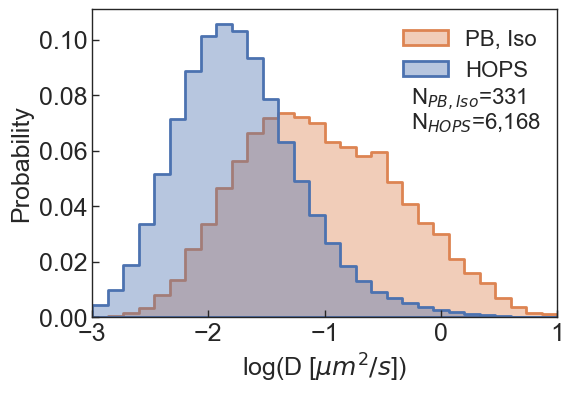

In [51]:
# Plot the probability distribution for each condition without KDE
color_dict = {"PB, Iso": "#DD8452", "HOPS": "#4C72B0"}
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=final_filtered_df,
    x='logD',
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(-3, 1),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["HOPS", "PB, Iso"]
)
# plt.axvline(1, ls="--", c="gray", lw=2)
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['PB, Iso', 'HOPS'], fontsize=16) 

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.text(
    -0.26, 0.0765,
    r"N$_{PB, Iso}$=" + f"{n_PB:,}",
    fontdict={"fontsize": 16}
)

plt.text(
     -0.26, 0.068,
    r"N$_{HOPS}$=" + f"{n_HOPS:,}",
    fontdict={"fontsize": 16}
)

plt.xlim(-3, 1) 
plt.ylim(0, None)
plt.xlabel('log(D [$\mu m^2/s$])', fontsize = 18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("D_histo.png", format="png", bbox_inches="tight", dpi=600)

In [ ]:
# New percentage calculations
# Calculate percentages for D thresholds
pb_mask = final_filtered_df['Condition'] == 'PB, Iso'
hops_mask = final_filtered_df['Condition'] == 'HOPS'

# Calculate percentages
pb_high = (final_filtered_df[pb_mask]['D_linear'] > 0.01).mean() * 100
pb_low = (final_filtered_df[pb_mask]['D_linear'] < 0.001).mean() * 100
hops_high = (final_filtered_df[hops_mask]['D_linear'] > 0.01).mean() * 100
hops_low = (final_filtered_df[hops_mask]['D_linear'] < 0.001).mean() * 100

# Create summary table
summary_df = pd.DataFrame({
    'Condition': ['PB, Iso', 'HOPS'],
    'D > 0.01 µm²/s (%)': [pb_high, hops_high],
    'D < 0.001 µm²/s (%)': [pb_low, hops_low]
}).round(2)

# Display and save results
print("\nDiffusion Coefficient Distribution Summary:")
display(summary_df)
summary_df.to_csv('D_threshold_percentages.csv', index=False)


Diffusion Coefficient Distribution Summary:


,Condition,D > 0.01 µm²/s (%),D < 0.001 µm²/s (%)
0,"PB, Iso",93.37,0.00
1,HOPS,67.05,0.23


## Diffusion coefficient GEM, 1x vs GEM, 2x

In [1]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
mean_step_size_threshold_nm = 30  
R2_threshold = 0.6
conversion_factor = 117 

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = basename(file)
        df = df.dropna(subset=['D_linear'])
        df['logD'] = np.log10(df['D_linear'])
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df

In [5]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'GEM, 1x')
df_condition2 = load_and_label_files(csv_files_2, 'GEM, 2x')

c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwa

In [6]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)
df_combined['mean_step_sizes_nm'] = df_combined['mean_step_sizes'] * conversion_factor

In [7]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes_nm'] > mean_step_size_threshold_nm]
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2_linear'] > 0.6]

In [8]:
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['Condition'] == condition]
    unique_titles = condition_df['title'].unique()
    unique_trackID_count = 0
    for title in unique_titles:
        unique_trackID_count += condition_df[condition_df['title'] == title]['trackID'].nunique()
    return unique_trackID_count

In [9]:
n_GEM_1x = calculate_unique_trackID_count(final_filtered_df, 'GEM, 1x')
n_GEM_2x = calculate_unique_trackID_count(final_filtered_df, 'GEM, 2x')

In [10]:
# Calculate mean logD values for each condition
mean_logD_1x = final_filtered_df[final_filtered_df['Condition'] == 'GEM, 1x']['logD'].mean()
mean_logD_2x = final_filtered_df[final_filtered_df['Condition'] == 'GEM, 2x']['logD'].mean()

C:\Users\bisal\AppData\Local\Temp\2\ipykernel_48064\2017765299.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = ax.legend_.legendHandles[::-1]


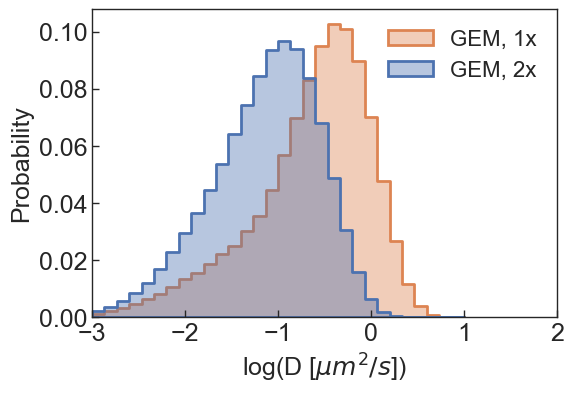

In [11]:
# Plot the probability distribution for each condition without KDE
color_dict = {"GEM, 1x": "#DD8452", "GEM, 2x": "#4C72B0"}
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=final_filtered_df,
    x='logD',
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(-3, 1),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["GEM, 2x", "GEM, 1x"]
)
# plt.axvline(1, ls="--", c="gray", lw=2)
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['GEM, 1x', 'GEM, 2x'], fontsize=16) 

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

# plt.text(
#     -0.75, 0.0765,
#     r"N$_{GEM, 1x}$=" + f"{n_GEM_1x:,}",
#     fontdict={"fontsize": 16}
# )

# plt.text(
#      -0.75, 0.068,
#     r"N$_{GEM, 2x}$=" + f"{n_GEM_2x:,}",
#     fontdict={"fontsize": 16}
# )

plt.xlim(-3, 2) 
plt.ylim(0, None)
plt.xlabel('log(D [$\mu m^2/s$])', fontsize = 18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("D_histo.png", format="png", bbox_inches="tight", dpi=600)

In [12]:
# Print mean values to console
print(f"Mean logD for GEM, 1x: {mean_logD_1x:.4f}")
print(f"Mean logD for GEM, 2x: {mean_logD_2x:.4f}")

Mean logD for GEM, 1x: -0.6543
Mean logD for GEM, 2x: -1.1503
